### Importação dos dados



In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f'Faturamento Loja 1: R$ {faturamento_loja1:,}')
print(f'Faturamento Loja 2: R$ {faturamento_loja2:,}')
print(f'Faturamento Loja 3: R$ {faturamento_loja3:,}')
print(f'Faturamento Loja 4: R$ {faturamento_loja4:,}')

Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


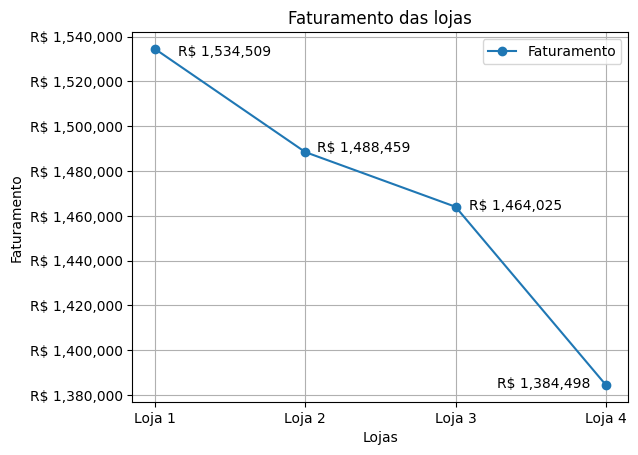

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.ylabel('Faturamento')
plt.xlabel('Lojas')
plt.title('Faturamento das lojas')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('R$ {x:,.0f}'))

plt.plot(lojas, faturamentos, label='Faturamento', marker='o')
plt.annotate(f'R$ {faturamento_loja1:,.0f}', (lojas.index('Loja 1'), faturamento_loja1), xytext=(50,-5), textcoords='offset points', ha='center')
plt.annotate(f'R$ {faturamento_loja2:,.0f}', (lojas.index('Loja 1'), faturamento_loja2), xytext=(150,0), textcoords='offset points', ha='center')
plt.annotate(f'R$ {faturamento_loja3:,.0f}', (lojas.index('Loja 1'), faturamento_loja3), xytext=(260,-2), textcoords='offset points', ha='center')
plt.annotate(f'R$ {faturamento_loja4:,.0f}', (lojas.index('Loja 1'), faturamento_loja4), xytext=(280,-2), textcoords='offset points', ha='center')

plt.legend()
plt.grid(True)
plt.show()

# 2. Vendas por Categoria


In [ ]:
import pandas as pd

lojas = [loja1, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

tabelas = [
    l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, nomes)
]


tabela_final = pd.concat(tabelas, axis=1)
tabela_final = tabela_final.fillna(0).astype(int)
tabela_final['Total de vendas por categoria'] = tabela_final.sum(axis=1)

linha_total = pd.DataFrame(tabela_final.sum(axis=0)).T.astype('object')
linha_total.index = ['Total de vendas por loja']
linha_total.at['Total de vendas por loja', 'Total de vendas por categoria'] = ' '

resultado = pd.concat([tabela_final, linha_total])
resultado
resultado.style.set_properties(subset=['Total de vendas por categoria'], **{'text-align': 'center'})

,Loja 1,Loja 2,Loja 3,Loja 4,Total de vendas por categoria
brinquedos,324,313,315,338,1290
eletrodomesticos,312,305,278,254,1149
eletronicos,448,422,451,451,1772
esporte e lazer,284,275,277,277,1113
instrumentos musicais,182,224,177,170,753
livros,173,197,185,187,742
moveis,465,442,499,480,1886
utilidades domesticas,171,181,177,201,730
Total de vendas por loja,2359,2359,2359,2358,


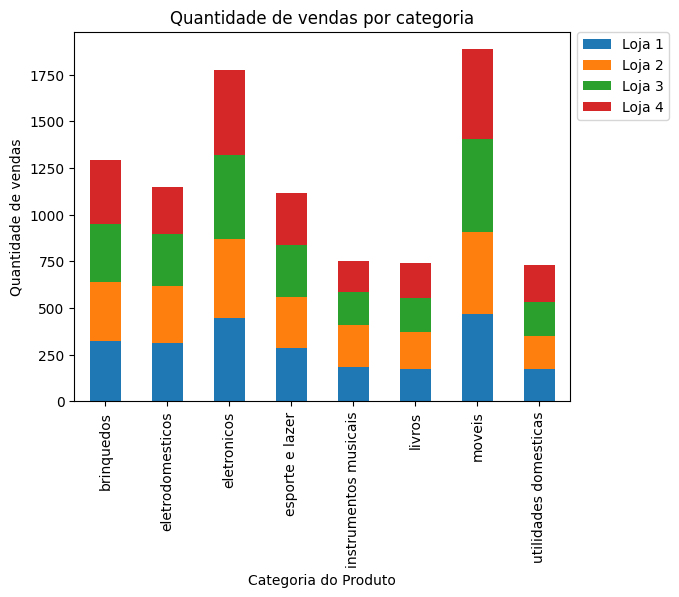

In [ ]:
import matplotlib.pyplot as plt

dados_para_grafico = tabela_final.drop(columns=['Total de vendas por categoria'])
dados_para_grafico.plot.bar(stacked=True)

plt.ylabel('Quantidade de vendas')
plt.xlabel('Categoria do Produto')
plt.title('Quantidade de vendas por categoria')
plt.legend(loc=6, bbox_to_anchor=(1, 0.88))

plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
avaliacao1 = loja1['Avaliação da compra'].sum() / len(loja1)
avaliacao2 = loja2['Avaliação da compra'].sum() / len(loja2)
avaliacao3 = loja3['Avaliação da compra'].sum() / len(loja3)
avaliacao4 = loja4['Avaliação da compra'].sum() / len(loja4)

print(f'Média de avaliação Loja 1: {round(avaliacao1,2)}\nMédia de avaliação Loja 2: {round(avaliacao2,2)}\nMédia de avaliação Loja 3: {round(avaliacao3,2)}\nMédia de avaliação Loja 4: {round(avaliacao4, 2)}')



Média de avaliação Loja 1: 3.98
Média de avaliação Loja 2: 4.04
Média de avaliação Loja 3: 4.05
Média de avaliação Loja 4: 4.0


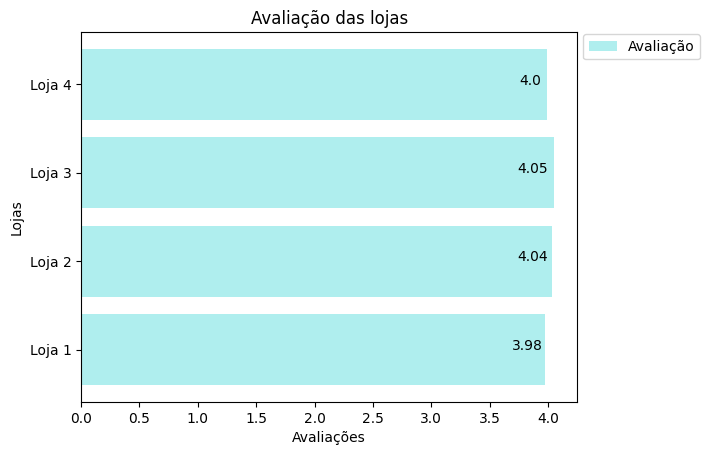

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes = [avaliacao1, avaliacao2, avaliacao3, avaliacao4]

plt.ylabel('Lojas')
plt.xlabel('Avaliações')
plt.title('Avaliação das lojas')

plt.barh(lojas, avaliacoes, label='Avaliação', color='paleturquoise')

plt.annotate(f'{round(avaliacao1,2)}', (avaliacao1, lojas.index('Loja 1')), xytext=(-13,0), textcoords='offset points', ha='center')
plt.annotate(f'{round(avaliacao2,2)}', (avaliacao2, lojas.index('Loja 2')), xytext=(-14,0), textcoords='offset points', ha='center')
plt.annotate(f'{round(avaliacao3,2)}', (avaliacao3, lojas.index('Loja 3')), xytext=(-15,0), textcoords='offset points', ha='center')
plt.annotate(f'{round(avaliacao4,2)}', (avaliacao4, lojas.index('Loja 4')), xytext=(-12,0), textcoords='offset points', ha='center')

plt.legend(loc=10, bbox_to_anchor=(1.13, 0.96))

# 4. Produtos Mais e Menos Vendidos

In [ ]:
def produtos_mais_menos_vendidos(lojas):
    resultados = {}
    for i, loja in enumerate(lojas):
        vendas_por_produto = loja['Produto'].value_counts()
        produto_mais_vendido = vendas_por_produto.index[0]
        produto_menos_vendido = vendas_por_produto.idxmin()
        quantidade_mais_vendido = vendas_por_produto[produto_mais_vendido]
        quantidade_menos_vendido = vendas_por_produto[produto_menos_vendido]
        resultados[f'Loja {i+1}'] = {'Mais vendido': produto_mais_vendido,
                                    'Quantidade ': quantidade_mais_vendido,
                                    'Menos vendido': produto_menos_vendido,
                                    'Quantidade': quantidade_menos_vendido}
    return resultados

lojas = [loja1, loja2, loja3, loja4]
produtos_vendidos = produtos_mais_menos_vendidos(lojas)
produtos_vendidos_df = pd.DataFrame.from_dict(produtos_vendidos, orient='index')
produtos_vendidos_df

,Mais vendido,Quantidade,Menos vendido,Quantidade
Loja 1,Micro-ondas,60,Headset,33
Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
Loja 3,Kit banquetas,57,Blocos de montar,35
Loja 4,Cama box,62,Guitarra,33


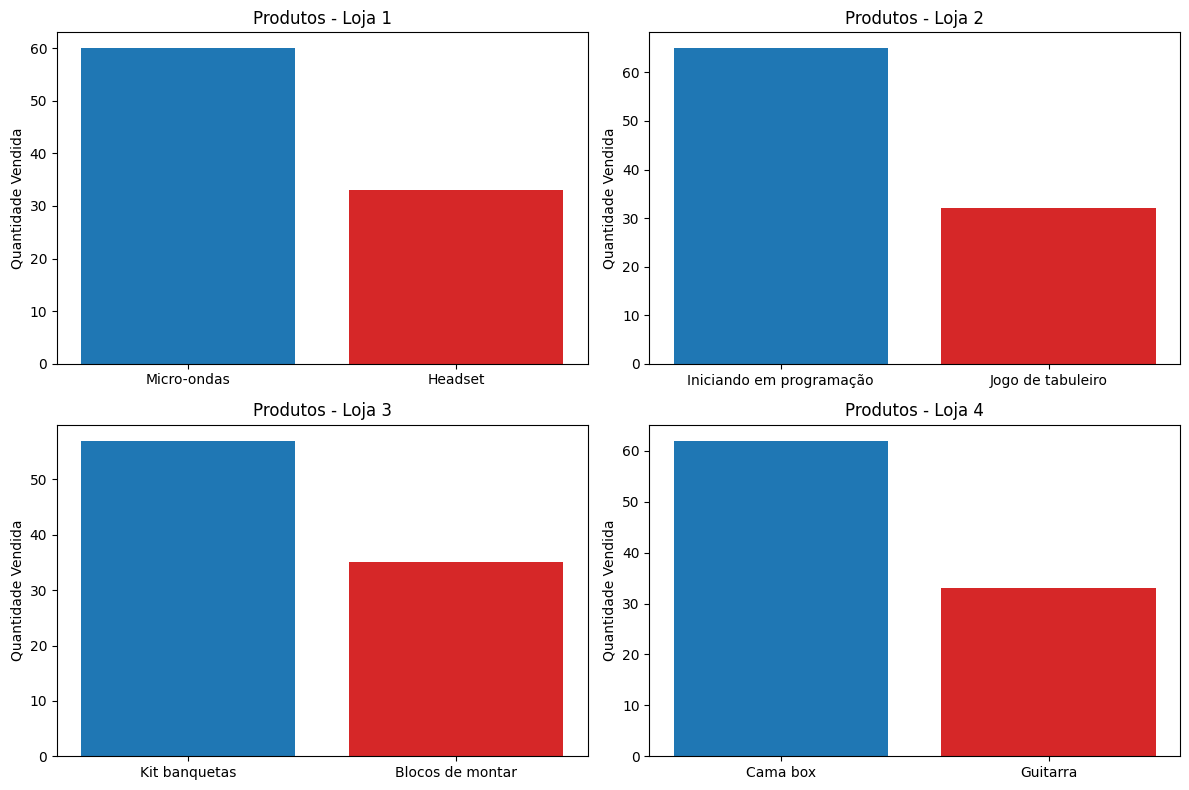

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

produtos_vendidos_df = pd.DataFrame.from_dict(produtos_vendidos, orient='index')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

lojas_dataframes = [loja1, loja2, loja3, loja4]

for i, loja in enumerate(produtos_vendidos_df.index):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    df_loja = lojas_dataframes[i]

    contagem = df_loja['Produto'].value_counts()

    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()

    produtos = [mais_vendido, menos_vendido]
    quantidades = [contagem[mais_vendido], contagem[menos_vendido]]

    ax.bar(produtos, quantidades, color=['tab:blue', 'tab:red'])
    ax.set_title(f'Produtos - {loja}')
    ax.set_ylabel('Quantidade Vendida')

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [ ]:
import numpy as np

frete_medio_loja1 = np.mean(loja1['Frete'])
frete_medio_loja2 = np.mean(loja2['Frete'])
frete_medio_loja3 = np.mean(loja3['Frete'])
frete_medio_loja4 = np.mean(loja4['Frete'])

print(f'Frete médio Loja 1: R$ {frete_medio_loja1:,.2f}\nFrete médio Loja 2: R$ {frete_medio_loja2:,.2f}\nFrete médio Loja 3: R$ {frete_medio_loja3:,.2f}\nFrete médio Loja 4: R$ {frete_medio_loja4:,.2f}')

Frete médio Loja 1: R$ 34.69
Frete médio Loja 2: R$ 33.62
Frete médio Loja 3: R$ 33.07
Frete médio Loja 4: R$ 31.28


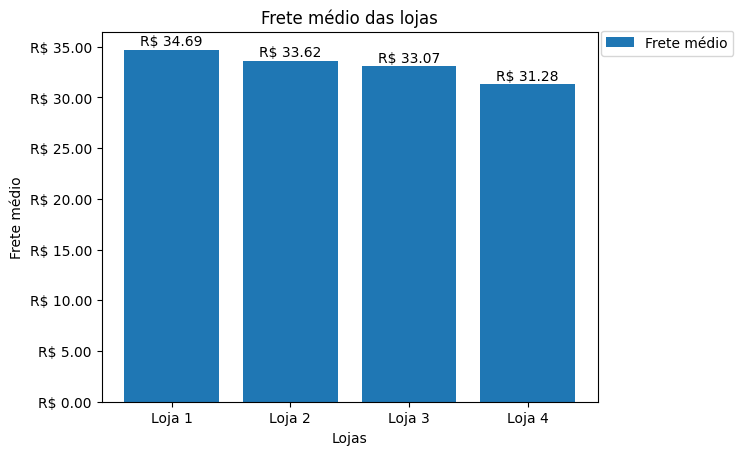

In [ ]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
frete_medio = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]

plt.ylabel('Frete médio')
plt.xlabel('Lojas')
plt.title('Frete médio das lojas')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('R$ {x:,.2f}'))

plt.bar(lojas, frete_medio, label='Frete médio', color='tab:blue')
plt.annotate(f'R$ {frete_medio_loja1:,.2f}', (lojas.index('Loja 1'), frete_medio_loja1), xytext=(0,3), textcoords='offset points', ha='center')
plt.annotate(f'R$ {frete_medio_loja2:,.2f}', (lojas.index('Loja 2'), frete_medio_loja2), xytext=(0,3), textcoords='offset points', ha='center')
plt.annotate(f'R$ {frete_medio_loja3:,.2f}', (lojas.index('Loja 3'), frete_medio_loja3), xytext=(0,3), textcoords='offset points', ha='center')
plt.annotate(f'R$ {frete_medio_loja4:,.2f}', (lojas.index('Loja 4'), frete_medio_loja4), xytext=(0,3), textcoords='offset points', ha='center')

plt.legend(loc=10, bbox_to_anchor=(1.14, 0.97))
plt.show()

#Relatório

Esse relatório tem o objetivo de ajudar o senhor João a vender uma das quatro lojas analisadas, segue abaixo detalhes sobre cada categoria.


##1 - Análise do faturamento

O faturamento de uma loja representa o total bruto de receitas obtidas com as vendas de produtos ou serviços. Importante lembrar que uma loja pode ter alto faturamento, mas ter prejuízo se os custos forem maiores que a receita.

````
Maior faturamento: Loja 1 R$ 1.534.509,12
Menor Faturamento: Loja 4 R$ 1.384.497,58
````

Nesse cenário a Loja 1 leva vantagem por demonstrar o maior faturamento, enquanto a Loja 4 fica com o menor, porém não houve cálculo de custos para determinar o lucro, assim essa categoria não gera grande relevância.


##2 - Vendas por Categoria

As vendas por categoria são fundamentais para a gestão estratégica de uma loja porque mostram a performance dos produtos. Essa análise ajuda a tomar decisões sobre estoque, marketing, precificação e expansão.

````
                        Loja 1	Loja 2	Loja 3	Loja 4	Total de vendas por categoria
brinquedos	           324	   313	   315	   338	            1290
eletrodomesticos	     312	   305	   278	   254	            1149
eletronicos	          448	   422	   451	   451	            1772
esporte e lazer	      284	   275	   277	   277	            1113
instrumentos musicais	182	   224	   177	   170	             753
livros	               173	   197	   185	   187	             742
moveis	               465	   442	   499	   480	            1886
utilidades domesticas	171	   181	   177	   201	             730
Total de vendas por loja 2359	  2359	  2359	  2358	             -
````

Através dos resultados acima, é possível identificar que a categoria de produtos com maior número de vendas são "Eletronicos e Moveis" e a menor são "Instrumentos Musicais, Livros e Utilidades Domesticas".

- Loja 1:
 - Vende mais: Eletrodomesticos e Esporte e Lazer
 - Vende menos: Livros e Utilidades Domesticas

- Loja 2:
 - Vende mais: Instrumentos Musicais e Livros
 - Vende menos: Brinquedos, Eletronicos, Esporte e Lazer e Moveis

- Loja 3:
 - Vende mais: Eletronicos e Moveis
 - Vende menos: -

- Loja 4:
 - Vende mais: Brinquedos, Eletronicos e Utilidades Domesticas
 - Vende menos: Eletrodomesticos e Instrumentos Musicais


Assim é possível afirmar que a Loja 3 é a que demonstra o melhor resultado pois lidera nas categorias que mais vende e não possui uma categoria que vende menos que as demais lojas.

Já a Loja 2 apresenta dificuldades de vender em quatro categorias importantes e lidera apenas em categorias com baixas vendas em geral.

##3 - Média de Avaliação das Lojas

A avaliação dos clientes são fundamentais para o sucesso de uma loja. Elas ajudam a construir confiança, atrair novos compradores, identificar pontos de melhoria e se destacar da concorrência. Além disso, contribuem para o aperfeiçoamento contínuo de produtos e serviços, aumentando a satisfação e fidelização dos clientes.

````
Média de avaliação Loja 1: 3.98
Média de avaliação Loja 2: 4.04
Média de avaliação Loja 3: 4.05
Média de avaliação Loja 4: 4.0
````

Nesse cenário podemos verificar que a Loja 3 lidera com a melhor média de avaliação, ao contrário da Loja 1 que fica com a menor, indicando que os clientes não estão satisfeitos com os serviços prestados.

##4 - Produtos Mais e Menos Vendidos

Analisar os produtos mais e menos vendidos é fundamental para entender o que os clientes realmente procuram e ajustar o estoque de forma inteligente. Assim evitando prejuízos com itens não vendidos, aproveitar os campeões de vendas e planejar promoções mais eficazes, aumentando a lucratividade e a eficiência do negócio.

````
          Mais vendido	          Quantidade   |	Menos vendido	      Quantidade
Loja 1	Micro-ondas	               60       |	Headset	                33
Loja 2	Iniciando em programação	  65       |	Jogo de tabuleiro	      32
Loja 3	Kit banquetas	             57       |	Blocos de montar	       35
Loja 4	Cama box	                  62       |	Guitarra	               33

````

Com esses resultados identificamos que a Loja 3 teve o menor número de vendas do seu produto mais vendido "Kit banquetas" em comparação com as demais lojas.

A Loja 2 indica menor quantidade de venda para o produto menos vendido "Jogo de tabuleiro", porem está dentro dos padrões em comparação com as demais lojas.

##5 - Frete Médio por Loja

O valor do frete é crucial para as vendas de uma loja, pois influencia diretamente a decisão de compra. Fretes altos podem afastar clientes, enquanto opções acessíveis ou gratuitas aumentam as chances de conversão, fidelização e competitividade no mercado.

````
Frete médio Loja 1: R$ 34.69
Frete médio Loja 2: R$ 33.62
Frete médio Loja 3: R$ 33.07
Frete médio Loja 4: R$ 31.28
````
Com essa análise identificamos que a Loja 4 oferece o menor frete médio que pode ser atrativo para um melhor desempenho nas vendas.

A Loja 1 ficou com o maior valor de frete médio, indicando que há um custo maior para o cliente ao comprar, assim o cliente pode optar por outras lojas impactando nas vendas da Loja 1.

#Conclusão

Indico ao senhor João que faça a venda da Loja 2, pois na análise de vendas por categoria, ela apresentou dificuldades de vendas nas principais categorias em comparação com as demais lojas. nas demais analises a Loja 2 apresenta resultados médios ou sem grande relevância.

A dificuldade de venda nas principais categorias afasta a Loja 2 do padrão das demais, gerando assim maiores dificuldades de gerenciamento para o senhor João.
